# This notebook produces fishing effort total per RFMO convention area and fishing effort by square unit area

### merge the files to create one RFMO shapefile classified by separate RFMO

In [2]:
import pandas as pd
import geopandas
import os
import shapely

In [3]:
CCAMLR = geopandas.read_file("RFB_CCAMLR.shp")
CCSBT = geopandas.read_file("RFB_CCSBT.shp")
GFCM = geopandas.read_file("RFB_GFCM.shp")
IATTC = geopandas.read_file("RFB_IATTC.shp")
ICCAT = geopandas.read_file("RFB_ICCAT.shp")
IOTC = geopandas.read_file("RFB_IOTC.shp")
IPHC = geopandas.read_file("RFB_IPHC.shp")
NAFO = geopandas.read_file("RFB_NAFO.shp")
NASCO = geopandas.read_file("RFB_NASCO.shp")
NEAFC = geopandas.read_file("RFB_NEAFC.shp")
NPAFC = geopandas.read_file("RFB_NPAFC.shp")
PSC = geopandas.read_file("RFB_PSC.shp")
SEAFO = geopandas.read_file("RFB_SEAFO.shp")
SIOFA = geopandas.read_file("RFB_SIOFA.shp")
SPRFMO = geopandas.read_file("RFB_SPRFMO.shp")
WCPFC = geopandas.read_file("RFB_WCPFC.shp")

In [5]:
WCPFC = WCPFC.to_crs('EPSG:4326')

<AxesSubplot: >

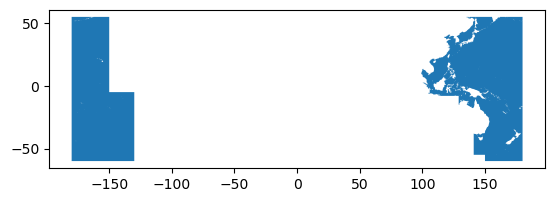

In [6]:
WCPFC.plot()

### calculate fishing effort total in each RFB (sum and then group by)

In [3]:
df = pd.read_csv('combined2019.csv')

In [4]:
print(df.head())

         date  cell_ll_lat  cell_ll_lon       mmsi   hours  fishing_hours
0  2019-01-01          0.0       -105.6  224900000  0.2036            0.0
1  2019-01-01          0.0       -105.3  224900000  0.0205            0.0
2  2019-01-01          0.0       -105.5  224900000  0.9008            0.0
3  2019-01-01          0.0       -105.4  224900000  0.8638            0.0
4  2019-01-01          0.0         -0.3  228071900  0.7969            0.0


In [5]:
len(df)

53903269

In [6]:
GFW2019Points = geopandas.GeoDataFrame(
    df, geometry=geopandas.points_from_xy(df.cell_ll_lon, df.cell_ll_lat), crs="EPSG:4326"
)

In [7]:
print(GFW2019Points.head())

         date  cell_ll_lat  cell_ll_lon       mmsi   hours  fishing_hours  \
0  2019-01-01          0.0       -105.6  224900000  0.2036            0.0   
1  2019-01-01          0.0       -105.3  224900000  0.0205            0.0   
2  2019-01-01          0.0       -105.5  224900000  0.9008            0.0   
3  2019-01-01          0.0       -105.4  224900000  0.8638            0.0   
4  2019-01-01          0.0         -0.3  228071900  0.7969            0.0   

                     geometry  
0  POINT (-105.60000 0.00000)  
1  POINT (-105.30000 0.00000)  
2  POINT (-105.50000 0.00000)  
3  POINT (-105.40000 0.00000)  
4    POINT (-0.30000 0.00000)  


In [8]:
len(GFW2019Points)

53903269

In [9]:
GFW2019Points[:10]

,date,cell_ll_lat,cell_ll_lon,mmsi,hours,fishing_hours,geometry
0,2019-01-01,0.0,-105.6,224900000,0.2036,0.0000,POINT (-105.60000 0.00000)
1,2019-01-01,0.0,-105.3,224900000,0.0205,0.0000,POINT (-105.30000 0.00000)
2,2019-01-01,0.0,-105.5,224900000,0.9008,0.0000,POINT (-105.50000 0.00000)
3,2019-01-01,0.0,-105.4,224900000,0.8638,0.0000,POINT (-105.40000 0.00000)
4,2019-01-01,0.0,-0.3,228071900,0.7969,0.0000,POINT (-0.30000 0.00000)
5,2019-01-01,0.0,-3.4,228280000,0.2202,0.0000,POINT (-3.40000 0.00000)
6,2019-01-01,0.0,-3.3,228280000,0.5377,0.0000,POINT (-3.30000 0.00000)
7,2019-01-01,0.0,-165.2,412205520,0.2119,0.2119,POINT (-165.20000 0.00000)
8,2019-01-01,0.0,-165.6,412205520,0.6711,0.6711,POINT (-165.60000 0.00000)
9,2019-01-01,0.0,-165.3,412205520,0.4850,0.4850,POINT (-165.30000 0.00000)


In [10]:
GFW2019Points = GFW2019Points[["date","mmsi","hours","fishing_hours","geometry"]]

In [11]:
del df

### clip to RFMO convention areas and assign each point an RFMO convention area separately to deal with space issue

#### CCAMLR

In [12]:
CCAMLR = CCAMLR.to_crs('EPSG:4326')

In [13]:
CCAMLR.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,12.0,1.0,1.0,1.0,1.0,1.0,CCAMLR,1662.664134,6665.400395,None,60.0,82.35,64.7,"POLYGON ((180.00000 -84.30220, 179.90840 -84.2..."


In [14]:
CCAMLREffort = GFW2019Points.clip(CCAMLR)

In [15]:
len(CCAMLREffort)

96215

In [16]:
CCAMLREffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
1086496,2019-01-09,512008000,0.8072,0.6013,POINT (170.90000 -77.40000)
952440,2019-01-08,512008000,0.2613,0.0000,POINT (170.90000 -77.40000)


In [17]:
flag_gear_df = pd.read_csv('fishing-vessels-flagonly.csv')

In [18]:
CCAMLREffort = pd.merge(CCAMLREffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [19]:
CCAMLRFishSUM = CCAMLREffort['fishing_hours'].sum()
print(CCAMLRFishSUM)

59121.10720000001


#### add the sum value to the RFMO polygon

In [20]:
effort = [59121.10720000001]
  
CCAMLR['FishingEffort_2019'] = effort

In [21]:
CCAMLR.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,12.0,1.0,1.0,1.0,1.0,1.0,CCAMLR,1662.664134,6665.400395,None,60.0,82.35,64.7,"POLYGON ((180.00000 -84.30220, 179.90840 -84.2...",59121.1072


#### group by flag state

In [22]:
CCAMLR_flagSUM = CCAMLREffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [23]:
CCAMLR_flagSUM.head(15)

,flag_gfw,fishing_hours
0,AUS,510.5506
1,CHL,5244.0545
2,CHN,6531.0032
3,FLK,134.3045
4,FRA,11255.6682
5,GBR,3631.4548
6,KOR,8306.4212
7,NOR,7425.0872
8,NZL,3618.5730
9,RUS,568.5739


In [24]:
del CCAMLREffort

##### calculate area of CCAMLR change to appropriate polar equal area projection in km^2

In [25]:
CCAMLR = CCAMLR.to_crs("EPSG:3974")
CCAMLR.crs

<Derived Projected CRS: EPSG:3974>
Name: WGS 84 / NSIDC EASE-Grid South
Axis Info [cartesian]:
- X[north]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: Southern hemisphere.
- bounds: (-180.0, -90.0, 180.0, 0.0)
Coordinate Operation:
- name: US NSIDC Equal Area south projection
- method: Lambert Azimuthal Equal Area (Spherical)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
CCAMLR["area"] = CCAMLR['geometry'].area/ 10**6
CCAMLR.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,12.0,1.0,1.0,1.0,1.0,1.0,CCAMLR,1662.664134,6665.400395,None,60.0,82.35,64.7,"POLYGON ((0.000 -636126.606, 1017.720 -636583....",59121.1072,3.567803e+07


In [27]:
CCAMLR.to_file('RFB_CCAMLR_New.shp')

/tmp/ipykernel_462/3471355295.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  CCAMLR.to_file('RFB_CCAMLR_New.shp')


In [28]:
del CCAMLR

#### CCSBT

In [29]:
CCSBT = CCSBT.to_crs('EPSG:4326')

In [30]:
CCSBT.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,79.0,1.0,5.0,1.0,3.0,3.0,CCSBT,703.702240,5243.076304,None,46.5,90.06,67.2,"POLYGON ((120.09870 -10.38000, 120.12050 -10.3..."
1,80.0,1.0,5.0,1.0,3.0,3.0,CCSBT,253.419862,1752.423860,None,46.5,90.06,67.2,"POLYGON ((-174.60280 -31.04080, -169.75280 -31..."


In [31]:
CCSBTEffort = GFW2019Points.clip(CCSBT)

In [32]:
len(CCSBTEffort)

2141828

In [33]:
CCSBTEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
32335559,2019-08-25,512411000,0.2619,0.0,POINT (170.60000 -52.90000)
32426164,2019-08-25,512411000,0.1386,0.0,POINT (170.40000 -53.10000)


In [34]:
CCSBTEffort = pd.merge(CCSBTEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [35]:
CCSBTFishSUM = CCSBTEffort['fishing_hours'].sum()
print(CCSBTFishSUM)

1681760.178999999


#### add the sum value to the RFMO polygon

In [36]:
CCSBT['FishingEffort_2019'] = CCSBTFishSUM

In [37]:
CCSBT.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,79.0,1.0,5.0,1.0,3.0,3.0,CCSBT,703.702240,5243.076304,None,46.5,90.06,67.2,"POLYGON ((120.09870 -10.38000, 120.12050 -10.3...",1681760.179
1,80.0,1.0,5.0,1.0,3.0,3.0,CCSBT,253.419862,1752.423860,None,46.5,90.06,67.2,"POLYGON ((-174.60280 -31.04080, -169.75280 -31...",1681760.179


#### group by flag state

In [38]:
CCSBT_flagSUM = CCSBTEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [39]:
CCSBT_flagSUM.head(15)

,flag_gfw,fishing_hours
0,ARE,56.0988
1,ARG,21327.9500
2,AUS,33200.2973
3,BLZ,1500.1628
4,BRA,19871.2578
5,CHL,42549.1529
6,CHN,89236.7682
7,CIV,31.1454
8,COK,2634.5420
9,ECU,784.8959


In [40]:
del CCSBTEffort

##### calculate area of CCSBT change to appropriate polar equal area projection

In [41]:
CCSBT = CCSBT.to_crs("ESRI:54012")
CCSBT.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [42]:
CCSBT["area"] = CCSBT['geometry'].area/ 10**6
CCSBT.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,79.0,1.0,5.0,1.0,3.0,3.0,CCSBT,703.702240,5243.076304,None,46.5,90.06,67.2,"POLYGON ((11216259.511 -1363791.202, 11218217....",1681760.179,5.006586e+07
1,80.0,1.0,5.0,1.0,3.0,3.0,CCSBT,253.419862,1752.423860,None,46.5,90.06,67.2,"POLYGON ((-15454209.007 -3970037.182, -1496785...",1681760.179,1.628845e+07


In [43]:
#CCSBT['effort_density'] = CCAMLR.FishingEffort_2019 / CCAMLR.area * 10**6

#CCAMLR.head(2)

In [44]:
CCSBT.to_file('RFB_CCSBT_New.shp')

/tmp/ipykernel_462/2766152735.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  CCSBT.to_file('RFB_CCSBT_New.shp')


### GFCM

In [45]:
GFCM = GFCM.to_crs('EPSG:4326')

In [46]:
GFCM.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,15.0,1.0,5.0,1.0,1.0,3.0,GFCM,362.45486,308.539628,None,40.5,81.49,50.65,"POLYGON ((39.27760 47.23120, 39.30000 47.07690..."


In [47]:
GFCMEffort = GFW2019Points.clip(GFCM)

In [48]:
len(GFCMEffort)

2679664

In [49]:
GFCMEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
47911270,2019-11-19,412331136,0.5611,0.0,POINT (-4.90000 36.00000)
27252132,2019-07-21,273854000,0.3436,0.0,POINT (-4.90000 36.00000)


In [50]:
GFCMEffort = pd.merge(GFCMEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [51]:
GFCMFishSUM = GFCMEffort['fishing_hours'].sum()
print(GFCMFishSUM)

3819808.7826999994


#### add the sum value to the RFMO polygon

In [52]:
GFCM['FishingEffort_2019'] = GFCMFishSUM

In [53]:
GFCM.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,15.0,1.0,5.0,1.0,1.0,3.0,GFCM,362.45486,308.539628,None,40.5,81.49,50.65,"POLYGON ((39.27760 47.23120, 39.30000 47.07690...",3.819809e+06


#### group by flag state

In [54]:
GFCM_flagSUM = GFCMEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [55]:
GFCM_flagSUM.head(15)

,flag_gfw,fishing_hours
0,ALB,29576.1554
1,BGR,52554.8907
2,BLZ,0.0000
3,CHN,0.0000
4,CPV,73.8043
5,CYP,26054.9708
6,DEU,82.9749
7,DZA,1018.8907
8,EGY,497.1255
9,ESP,695570.5854


In [56]:
del GFCMEffort

##### calculate area of GFCM change to appropriate polar equal area projection

In [57]:
GFCM = GFCM.to_crs("ESRI:54012")
GFCM.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [58]:
GFCM["area"] = GFCM['geometry'].area/ 10**6
GFCM.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,15.0,1.0,5.0,1.0,1.0,3.0,GFCM,362.45486,308.539628,None,40.5,81.49,50.65,"POLYGON ((3192370.095 5789798.450, 3197458.595...",3.819809e+06,3.000341e+06


In [59]:
GFCM.to_file('RFB_GFCM_New.shp')

/tmp/ipykernel_462/1328183924.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  GFCM.to_file('RFB_GFCM_New.shp')


### IATTC

In [60]:
IATTC = IATTC.to_crs('EPSG:4326')

In [61]:
IATTC.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,16.0,1.0,1.0,1.0,1.0,1.0,IATTC,570.165981,6014.624087,None,52.0,79.31,57.76,"MULTIPOLYGON (((-123.90050 49.81290, -123.9200..."


In [62]:
IATTCEffort = GFW2019Points.clip(IATTC)

In [63]:
len(IATTCEffort)

3696876

In [64]:
IATTCEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
11472567,2019-03-27,261084090,0.1497,0.0,POINT (-79.80000 -50.00000)
11506055,2019-03-27,261084090,0.4308,0.0,POINT (-79.90000 -49.90000)


In [65]:
IATTCEffort = pd.merge(IATTCEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [66]:
IATTCFishSUM = IATTCEffort['fishing_hours'].sum()
print(IATTCFishSUM)

2432813.844299998


#### add the sum value to the RFMO polygon

In [67]:
IATTC['FishingEffort_2019'] = IATTCFishSUM

In [68]:
IATTC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,16.0,1.0,1.0,1.0,1.0,1.0,IATTC,570.165981,6014.624087,None,52.0,79.31,57.76,"MULTIPOLYGON (((-123.90050 49.81290, -123.9200...",2.432814e+06


#### group by flag state

In [69]:
IATTC_flagSUM = IATTCEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [70]:
IATTC_flagSUM.head(15)

,flag_gfw,fishing_hours
0,ALB,6.946602e+02
1,ARG,0.000000e+00
2,ATF,2.220676e+02
3,BMU,1.477763e+03
4,CAN,3.233334e+04
5,CHL,6.154967e+04
6,CHN,1.157960e+06
7,COK,1.767939e+03
8,COL,1.933406e+04
9,ECU,2.822103e+04


In [71]:
del IATTCEffort

##### calculate area of IATTC change to appropriate polar equal area projection

In [72]:
IATTC = IATTC.to_crs("ESRI:54012")
IATTC.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [73]:
IATTC["area"] = IATTC['geometry'].area/ 10**6
IATTC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,16.0,1.0,1.0,1.0,1.0,1.0,IATTC,570.165981,6014.624087,None,52.0,79.31,57.76,"MULTIPOLYGON (((-9892833.000 6052768.270, -989...",2.432814e+06,6.635639e+07


In [74]:
IATTC.to_file('RFB_IATTC_New.shp')

/tmp/ipykernel_462/1562276663.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  IATTC.to_file('RFB_IATTC_New.shp')


### ICCAT

In [75]:
ICCAT = ICCAT.to_crs('EPSG:4326')

In [76]:
ICCAT.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,3.0,1.0,5.0,1.0,1.0,3.0,ICCAT,3076.047265,9258.257489,None,52.0,82.05,49.05,"MULTIPOLYGON (((10.97940 54.38060, 10.94650 54..."


In [77]:
ICCATEffort = GFW2019Points.clip(ICCAT)

In [78]:
len(ICCATEffort)

17466971

In [79]:
ICCATEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
2230639,2019-01-18,440755000,0.2830,0.0,POINT (-67.70000 -60.00000)
2230635,2019-01-18,440755000,0.2844,0.0,POINT (-67.50000 -60.00000)


In [80]:
ICCATEffort = pd.merge(ICCATEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [81]:
ICCATFishSUM = ICCATEffort['fishing_hours'].sum()
print(ICCATFishSUM)

18012376.464699995


#### add the sum value to the RFMO polygon

In [82]:
ICCAT['FishingEffort_2019'] = ICCATFishSUM

In [83]:
ICCAT.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,3.0,1.0,5.0,1.0,1.0,3.0,ICCAT,3076.047265,9258.257489,None,52.0,82.05,49.05,"MULTIPOLYGON (((10.97940 54.38060, 10.94650 54...",1.801238e+07


#### group by flag state

In [84]:
ICCAT_flagSUM = ICCATEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [85]:
ICCAT_flagSUM.head(15)

,flag_gfw,fishing_hours
0,AFG,307.1618
1,AGO,63906.7011
2,ALB,29576.1554
3,ARE,97.1486
4,ARG,583733.6568
5,BEL,129448.5476
6,BGR,52554.8907
7,BLZ,17434.4315
8,BMU,486.3601
9,BRA,354690.7637


In [86]:
del ICCATEffort

##### calculate area of ICCAT change to appropriate polar equal area projection

In [87]:
ICCAT = ICCAT.to_crs("ESRI:54012")
ICCAT.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [88]:
ICCAT["area"] = ICCAT['geometry'].area/ 10**6
ICCAT.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,3.0,1.0,5.0,1.0,1.0,3.0,ICCAT,3076.047265,9258.257489,None,52.0,82.05,49.05,"MULTIPOLYGON (((846747.489 6495512.240, 844183...",1.801238e+07,8.895806e+07


In [89]:
ICCAT.to_file('RFB_ICCAT_New.shp')

/tmp/ipykernel_462/2536163750.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  ICCAT.to_file('RFB_ICCAT_New.shp')


### IOTC

In [90]:
IOTC = IOTC.to_crs('EPSG:4326')

In [91]:
IOTC.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,81.0,1.0,2.0,1.0,1.0,1.0,IOTC,933.887727,6092.753554,None,47.0,84.62,40.91,"POLYGON ((49.26350 30.42910, 49.22250 30.37330..."


In [92]:
IOTCEffort = GFW2019Points.clip(IOTC)

In [93]:
len(IOTCEffort)

2666530

In [94]:
IOTCEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
32176021,2019-08-24,503748900,0.1580,0.0,POINT (149.70000 -37.80000)
18146936,2019-05-09,503316000,0.8502,0.0,POINT (149.70000 -37.80000)


In [95]:
IOTCEffort = pd.merge(IOTCEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [96]:
IOTCFishSUM = IOTCEffort['fishing_hours'].sum()
print(IOTCFishSUM)

3137980.7563999994


#### add the sum value to the RFMO polygon

In [97]:
IOTC['FishingEffort_2019'] = IOTCFishSUM

In [98]:
IOTC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,81.0,1.0,2.0,1.0,1.0,1.0,IOTC,933.887727,6092.753554,None,47.0,84.62,40.91,"POLYGON ((49.26350 30.42910, 49.22250 30.37330...",3.137981e+06


#### group by flag state

In [99]:
IOTC_flagSUM = IOTCEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [100]:
IOTC_flagSUM.head(15)

,flag_gfw,fishing_hours
0,ARG,12.6424
1,AUS,86226.9238
2,AZE,70.8080
3,BHR,25171.6117
4,BLZ,209.5523
5,CHN,310160.3254
6,CIV,61.0439
7,COK,1082.5996
8,ESP,41615.3091
9,FRA,54969.4864


In [101]:
del IOTCEffort

##### calculate area of IOTC change to appropriate polar equal area projection

In [102]:
IOTC = IOTC.to_crs("ESRI:54012")
IOTC.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [103]:
IOTC["area"] = IOTC['geometry'].area/ 10**6
IOTC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,81.0,1.0,2.0,1.0,1.0,1.0,IOTC,933.887727,6092.753554,None,47.0,84.62,40.91,"POLYGON ((4370910.894 3896514.433, 4368225.740...",3.137981e+06,6.468506e+07


In [104]:
IOTC.to_file('RFB_IOTC_New.shp')

/tmp/ipykernel_462/3881208817.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  IOTC.to_file('RFB_IOTC_New.shp')


### IPHC

In [105]:
IPHC = IPHC.to_crs('EPSG:4326')

In [106]:
IPHC.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,83.0,1.0,4.0,1.0,3.0,3.0,IPHC,616.999916,551.340764,<Null>,38.5,82.23,65.19,"MULTIPOLYGON (((179.06630 55.35010, 179.11520 ..."


In [107]:
IPHCEffort = GFW2019Points.clip(IPHC)

In [108]:
len(IPHCEffort)

1379265

In [109]:
IPHCEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
49375164,2019-11-28,367347000,1.2083,0.0,POINT (-128.40000 40.50000)
49375163,2019-11-28,367324020,0.6174,0.0,POINT (-128.70000 40.50000)


In [110]:
IPHCEffort = pd.merge(IPHCEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [111]:
IPHCFishSUM = IPHCEffort['fishing_hours'].sum()
print(IPHCFishSUM)

645108.8083999999


#### add the sum value to the RFMO polygon

In [112]:
IPHC['FishingEffort_2019'] = IPHCFishSUM

In [113]:
IPHC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,83.0,1.0,4.0,1.0,3.0,3.0,IPHC,616.999916,551.340764,<Null>,38.5,82.23,65.19,"MULTIPOLYGON (((179.06630 55.35010, 179.11520 ...",645108.8084


#### group by flag state

In [114]:
IPHC_flagSUM = IPHCEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [115]:
IPHC_flagSUM.head(15)

,flag_gfw,fishing_hours
0,CAN,94529.9942
1,CHN,644.7310
2,CYP,34.7744
3,KOR,312.4084
4,RUS,2364.8022
5,USA,547124.2276


In [116]:
del IPHCEffort

##### calculate area of IPHC change to appropriate polar equal area projection

In [117]:
IPHC = IPHC.to_crs("ESRI:54012")
IPHC.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [118]:
IPHC["area"] = IPHC['geometry'].area/ 10**6
IPHC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,83.0,1.0,4.0,1.0,3.0,3.0,IPHC,616.999916,551.340764,<Null>,38.5,82.23,65.19,"MULTIPOLYGON (((13700729.308 6585516.802, 1370...",645108.8084,3.942942e+06


In [119]:
IPHC.to_file('RFB_IPHC_New.shp')

/tmp/ipykernel_462/2589414214.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  IPHC.to_file('RFB_IPHC_New.shp')


### NAFO

In [120]:
NAFO = NAFO.to_crs('EPSG:4326')

In [121]:
NAFO.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,18.0,1.0,5.0,1.0,1.0,3.0,NAFO,947.281272,873.836352,None,44.5,82.71,67.03,"MULTIPOLYGON (((-73.03940 78.15280, -73.01330 ..."


In [122]:
NAFOEffort = GFW2019Points.clip(NAFO)

In [123]:
len(NAFOEffort)

919931

In [124]:
NAFOEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
49308914,2019-11-27,367719840,8.0502,8.0502,POINT (-74.20000 36.10000)
41810951,2019-10-14,367654150,16.9227,16.9227,POINT (-74.20000 36.20000)


In [125]:
NAFOEffort = pd.merge(NAFOEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [126]:
NAFOFishSUM = NAFOEffort['fishing_hours'].sum()
print(NAFOFishSUM)

1032462.2302000002


#### add the sum value to the RFMO polygon

In [127]:
NAFO['FishingEffort_2019'] = NAFOFishSUM

In [128]:
NAFO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,18.0,1.0,5.0,1.0,1.0,3.0,NAFO,947.281272,873.836352,None,44.5,82.71,67.03,"MULTIPOLYGON (((-73.03940 78.15280, -73.01330 ...",1.032462e+06


#### group by flag state

In [129]:
NAFO_flagSUM = NAFOEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [130]:
NAFO_flagSUM.head(15)

,flag_gfw,fishing_hours
0,BMU,42.4751
1,CAN,410196.1910
2,CHN,0.0000
3,DEU,2106.8726
4,DNK,29590.9592
5,ESP,53911.3537
6,EST,8603.5645
7,FRA,1057.9057
8,FRO,3034.3415
9,GRL,85012.0769


In [131]:
del NAFOEffort

##### calculate area of NAFO change to appropriate polar equal area projection

In [132]:
NAFO = NAFO.to_crs("ESRI:54012")
NAFO.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [133]:
NAFO["area"] = NAFO['geometry'].area/ 10**6
NAFO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,18.0,1.0,5.0,1.0,1.0,3.0,NAFO,947.281272,873.836352,None,44.5,82.71,67.03,"MULTIPOLYGON (((-4301588.543 8185398.530, -430...",1.032462e+06,6.295071e+06


In [134]:
NAFO.to_file('RFB_NAFO_New.shp')

/tmp/ipykernel_462/3375369213.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  NAFO.to_file('RFB_NAFO_New.shp')


### NASCO

In [135]:
NASCO = NASCO.to_crs('EPSG:4326')

In [136]:
NASCO.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,19.0,1.0,5.0,1.0,1.0,3.0,NASCO,2759.185492,4172.004303,None,30.0,76.89,55.88,"MULTIPOLYGON (((10.97940 54.38060, 10.94650 54..."


In [137]:
from shapely.geometry import Polygon

In [138]:
poly1 = Polygon( [[-85,30], [-85,90], [70,90], [70,30]]) 

In [139]:
NASCO = NASCO.clip(poly1)

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [140]:
NASCO.bounds

,minx,miny,maxx,maxy
0,-82.1587,36.0027,68.4973,90.0


In [141]:
NASCOEffort = GFW2019Points.clip(NASCO)

In [142]:
len(NASCOEffort)

11569480

In [143]:
NASCOEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
45055496,2019-11-01,224069970,2.5149,0.0000,POINT (-9.10000 36.10000)
42190259,2019-10-16,224134470,6.3727,6.3727,POINT (-9.10000 36.10000)


In [144]:
NASCOEffort = pd.merge(NASCOEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [145]:
NASCOFishSUM = NASCOEffort['fishing_hours'].sum()
print(NASCOFishSUM)

10272870.645799994


#### add the sum value to the RFMO polygon

In [146]:
NASCO['FishingEffort_2019'] = NASCOFishSUM

In [147]:
NASCO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,19.0,1.0,5.0,1.0,1.0,3.0,NASCO,2759.185492,4172.004303,None,30.0,76.89,55.88,"MULTIPOLYGON (((10.94650 54.38450, 10.88530 54...",1.027287e+07


#### group by flag state

In [148]:
NASCO_flagSUM = NASCOEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [149]:
NASCO_flagSUM.head(15)

,flag_gfw,fishing_hours
0,AGO,9.255000e-01
1,ARG,5.305400e+00
2,BEL,1.294485e+05
3,BLZ,3.846718e+03
4,BMU,3.759040e+01
5,CAN,4.102031e+05
6,CHE,1.032238e+02
7,CHN,2.395510e+01
8,DEU,2.047129e+05
9,DNK,5.781282e+05


In [150]:
del NASCOEffort

##### calculate area of NASCO

In [151]:
NASCO = NASCO.to_crs("ESRI:54012")
NASCO.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [152]:
NASCO["area"] = NASCO['geometry'].area/ 10**6
NASCO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,19.0,1.0,5.0,1.0,1.0,3.0,NASCO,2759.185492,4172.004303,None,30.0,76.89,55.88,"MULTIPOLYGON (((844183.599 6495877.193, 839617...",1.027287e+07,2.032979e+07


In [153]:
NASCO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,19.0,1.0,5.0,1.0,1.0,3.0,NASCO,2759.185492,4172.004303,None,30.0,76.89,55.88,"MULTIPOLYGON (((844183.599 6495877.193, 839617...",1.027287e+07,2.032979e+07


In [154]:
NASCO.to_file('RFB_NASCO_New.shp')

/tmp/ipykernel_462/819822497.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  NASCO.to_file('RFB_NASCO_New.shp')


### NEAFC

In [155]:
NEAFC = NEAFC.to_crs('EPSG:4326')

<AxesSubplot: >

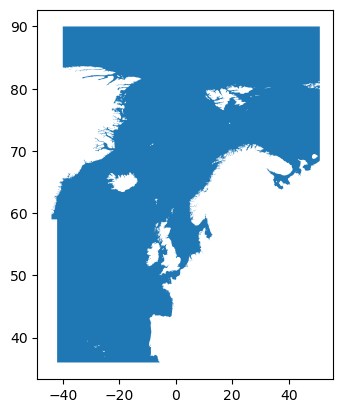

In [156]:
NEAFC.plot()

In [157]:
NEAFC.bounds

,minx,miny,maxx,maxy
0,-44.1996,36.0027,50.9973,90.0027


In [158]:
poly2 = Polygon( [[-50,30], [-50,90], [55,90], [55,30]]) 

In [159]:
NEAFC = NEAFC.clip(poly2)

/srv/conda/envs/notebook/lib/python3.10/site-packages/geopandas/tools/clip.py:67: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  clipped.loc[


In [160]:
NEAFC.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,4.0,1.0,1.0,1.0,1.0,1.0,NEAFC,1495.463289,2998.96851,None,42.5,78.9,55.84,"MULTIPOLYGON (((50.99730 80.79540, 50.99730 80..."


In [161]:
NEAFCEffort = GFW2019Points.clip(NEAFC)

In [162]:
len(NEAFCEffort)

10187322

In [163]:
NEAFCEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
45055496,2019-11-01,224069970,2.5149,0.0000,POINT (-9.10000 36.10000)
42190259,2019-10-16,224134470,6.3727,6.3727,POINT (-9.10000 36.10000)


In [164]:
NEAFCEffort = pd.merge(NEAFCEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [165]:
NEAFCFishSUM = NEAFCEffort['fishing_hours'].sum()
print(NEAFCFishSUM)

8856218.361700004


#### add the sum value to the RFMO polygon

In [166]:
NEAFC['FishingEffort_2019'] = NEAFCFishSUM

In [167]:
NEAFC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,4.0,1.0,1.0,1.0,1.0,1.0,NEAFC,1495.463289,2998.96851,None,42.5,78.9,55.84,"MULTIPOLYGON (((50.99730 80.79540, 50.99730 80...",8.856218e+06


#### group by flag state

In [168]:
NEAFC_flagSUM = NEAFCEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [169]:
NEAFC_flagSUM.head(15)

,flag_gfw,fishing_hours
0,AGO,9.255000e-01
1,ARG,5.305400e+00
2,BEL,1.294485e+05
3,BLZ,3.846718e+03
4,CAN,8.493100e+00
5,CHE,6.828260e+01
6,CHN,2.395510e+01
7,DEU,1.864524e+05
8,DNK,5.079803e+05
9,ECU,9.471000e-01


In [170]:
del NEAFCEffort

##### calculate area of NEAFC change to appropriate polar equal area projection

In [171]:
NEAFC = NEAFC.to_crs("ESRI:54012")
NEAFC.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [172]:
NEAFC["area"] = NEAFC['geometry'].area/ 10**6
NEAFC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,4.0,1.0,1.0,1.0,1.0,1.0,NEAFC,1495.463289,2998.96851,None,42.5,78.9,55.84,"MULTIPOLYGON (((2877296.206 8289053.960, 28783...",8.856218e+06,1.349665e+07


In [173]:
NEAFC.to_file('RFB_NEAFC_New.shp')

/tmp/ipykernel_462/274650972.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  NEAFC.to_file('RFB_NEAFC_New.shp')


### NPAFC

In [174]:
NPAFC = NPAFC.to_crs('EPSG:4326')

In [175]:
NPAFC.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,20.0,1.0,4.0,1.0,1.0,3.0,NPAFC,96.843791,483.315450,None,30.5,78.06,43.91,"POLYGON ((167.44680 51.18950, 167.44780 51.189..."
1,21.0,1.0,4.0,1.0,1.0,3.0,NPAFC,11.585180,5.956092,None,30.5,78.06,43.91,"POLYGON ((149.07450 50.72450, 149.07370 50.723..."
2,22.0,1.0,4.0,1.0,1.0,3.0,NPAFC,142.642707,951.224876,None,30.5,78.06,43.91,"POLYGON ((-141.69310 56.09770, -141.69270 56.0..."
3,36.0,1.0,4.0,1.0,1.0,3.0,NPAFC,16.151204,12.153845,None,30.5,78.06,43.91,"POLYGON ((180.00000 55.80000, 179.99090 55.800..."
4,37.0,1.0,4.0,1.0,1.0,3.0,NPAFC,13.431284,7.374810,None,30.5,78.06,43.91,"POLYGON ((-178.77480 55.67520, -178.77510 55.6..."


In [176]:
NPAFCEffort = GFW2019Points.clip(NPAFC)

In [177]:
len(NPAFCEffort)

748537

In [178]:
NPAFCEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
43347971,2019-10-23,416081500,0.4988,0.0,POINT (166.20000 33.00000)
43347966,2019-10-23,416081500,0.4600,0.0,POINT (166.30000 33.00000)


In [179]:
NPAFCEffort = pd.merge(NPAFCEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [180]:
NPAFCFishSUM = NPAFCEffort['fishing_hours'].sum()
print(NPAFCFishSUM)

632737.778


#### add the sum value to the RFMO polygon

In [181]:
NPAFC['FishingEffort_2019'] = NPAFCFishSUM

In [182]:
NPAFC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,20.0,1.0,4.0,1.0,1.0,3.0,NPAFC,96.843791,483.315450,None,30.5,78.06,43.91,"POLYGON ((167.44680 51.18950, 167.44780 51.189...",632737.778
1,21.0,1.0,4.0,1.0,1.0,3.0,NPAFC,11.585180,5.956092,None,30.5,78.06,43.91,"POLYGON ((149.07450 50.72450, 149.07370 50.723...",632737.778


#### group by flag state

In [183]:
NPAFC_flagSUM = NPAFCEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [184]:
NPAFC_flagSUM.head(15)

,flag_gfw,fishing_hours
0,CAN,404.1653
1,CHN,147237.5809
2,CYP,0.0000
3,IRN,10.4144
4,JPN,249444.8172
5,KOR,5914.3101
6,RUS,5403.1944
7,TWN,191906.9956
8,UNK,732.7369
9,USA,10182.8454


In [185]:
del NPAFCEffort

##### calculate area of NPAFC change to appropriate polar equal area projection

In [186]:
NPAFC = NPAFC.to_crs("ESRI:54012")
NPAFC.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [187]:
NPAFC["area"] = NPAFC['geometry'].area/ 10**6
NPAFC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,20.0,1.0,4.0,1.0,1.0,3.0,NPAFC,96.843791,483.315450,None,30.5,78.06,43.91,"POLYGON ((13236628.904 6189334.322, 13236717.7...",632737.778,4.545164e+06
1,21.0,1.0,4.0,1.0,1.0,3.0,NPAFC,11.585180,5.956092,None,30.5,78.06,43.91,"POLYGON ((11824714.119 6143496.744, 11824702.5...",632737.778,4.420253e+04


In [188]:
NPAFC.to_file('RFB_NPAFC_New.shp')

/tmp/ipykernel_462/81930203.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  NPAFC.to_file('RFB_NPAFC_New.shp')


### PSC

In [189]:
PSC = PSC.to_crs('EPSG:4326')

In [190]:
PSC.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,31.0,1.0,4.0,1.0,1.0,3.0,PSC,507.432030,112.762158,None,31.5,76.89,55.88,"MULTIPOLYGON (((-141.39660 60.13760, -141.3949..."
1,85.0,1.0,5.0,2.0,4.0,3.0,PSC,490.843924,100.156167,None,31.5,76.89,55.88,"MULTIPOLYGON (((-144.04830 60.03080, -144.0333..."


In [191]:
PSCEffort = GFW2019Points.clip(PSC)

In [192]:
len(PSCEffort)

541581

In [193]:
PSCEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
14157075,2019-04-12,367618000,0.4380,0.0,POINT (-129.40000 46.60000)
14124678,2019-04-12,367618000,0.1641,0.0,POINT (-129.60000 46.70000)


In [194]:
PSCEffort = pd.merge(PSCEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [195]:
PSCFishSUM = PSCEffort['fishing_hours'].sum()
print(PSCFishSUM)

247010.41730000006


#### add the sum value to the RFMO polygon

In [196]:
PSC['FishingEffort_2019'] = PSCFishSUM

In [197]:
PSC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,31.0,1.0,4.0,1.0,1.0,3.0,PSC,507.432030,112.762158,None,31.5,76.89,55.88,"MULTIPOLYGON (((-141.39660 60.13760, -141.3949...",247010.4173
1,85.0,1.0,5.0,2.0,4.0,3.0,PSC,490.843924,100.156167,None,31.5,76.89,55.88,"MULTIPOLYGON (((-144.04830 60.03080, -144.0333...",247010.4173


#### group by flag state

In [198]:
PSC_flagSUM = PSCEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [199]:
PSC_flagSUM.head(15)

,flag_gfw,fishing_hours
0,CAN,130337.6536
1,USA,116590.7656


In [200]:
del PSCEffort

##### calculate area of PSC change to appropriate polar equal area projection

In [201]:
PSC = PSC.to_crs("ESRI:54012")
PSC.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [202]:
PSC["area"] = PSC['geometry'].area/ 10**6
PSC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,31.0,1.0,4.0,1.0,1.0,3.0,PSC,507.432030,112.762158,None,31.5,76.89,55.88,"MULTIPOLYGON (((-10370053.810 7007722.505, -10...",247010.4173,839914.717785
1,85.0,1.0,5.0,2.0,4.0,3.0,PSC,490.843924,100.156167,None,31.5,76.89,55.88,"MULTIPOLYGON (((-10575149.540 6998727.200, -10...",247010.4173,722371.161757


In [203]:
PSC.to_file('RFB_PSC_New.shp')

/tmp/ipykernel_462/3709390586.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  PSC.to_file('RFB_PSC_New.shp')


### SEAFO

In [204]:
SEAFO = SEAFO.to_crs('EPSG:4326')

In [205]:
SEAFO.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,26.0,1.0,4.0,1.0,1.0,1.0,SEAFO,274.151053,1505.45815,None,47.5,76.89,57.14,"POLYGON ((-10.00000 -3.76690, -10.00000 -4.744..."


In [206]:
SEAFOEffort = GFW2019Points.clip(SEAFO)

In [207]:
len(SEAFOEffort)

584454

In [208]:
SEAFOEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
38326879,2019-09-26,259539000,0.5166,0.0,POINT (-20.00000 -49.40000)
34713655,2019-09-07,412217999,0.5030,0.0,POINT (-20.00000 -48.90000)


In [209]:
SEAFOEffort = pd.merge(SEAFOEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [210]:
SEAFOFishSUM = SEAFOEffort['fishing_hours'].sum()
print(SEAFOFishSUM)

365893.185


#### add the sum value to the RFMO polygon

In [211]:
SEAFO['FishingEffort_2019'] = SEAFOFishSUM

In [212]:
SEAFO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,26.0,1.0,4.0,1.0,1.0,1.0,SEAFO,274.151053,1505.45815,None,47.5,76.89,57.14,"POLYGON ((-10.00000 -3.76690, -10.00000 -4.744...",365893.185


#### group by flag state

In [213]:
SEAFO_flagSUM = SEAFOEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [214]:
SEAFO_flagSUM.head(15)

,flag_gfw,fishing_hours
0,AGO,0.0000
1,BLZ,595.7267
2,CHN,18706.0858
3,CIV,0.0000
4,COK,67.6166
5,CPV,19.3709
6,CUW,51.6428
7,ESP,57003.8865
8,FLK,2.5047
9,FRA,410.8018


In [215]:
del SEAFOEffort

##### calculate area of SEAFO change to appropriate polar equal area projection

In [216]:
SEAFO = SEAFO.to_crs("ESRI:54012")
SEAFO.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [217]:
SEAFO["area"] = SEAFO['geometry'].area/ 10**6
SEAFO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,26.0,1.0,4.0,1.0,1.0,1.0,SEAFO,274.151053,1505.45815,None,47.5,76.89,57.14,"POLYGON ((-939257.306 -496340.270, -938782.389...",365893.185,1.568218e+07


In [218]:
SEAFO.to_file('RFB_SEAFO_New.shp')

/tmp/ipykernel_462/2711700028.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  SEAFO.to_file('RFB_SEAFO_New.shp')


### SIOFA

In [219]:
SIOFA = SIOFA.to_crs('EPSG:4326')

In [220]:
SIOFA.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,5.0,1.0,4.0,1.0,1.0,3.0,SIOFA,404.652431,2629.902136,None,45.0,76.89,57.14,"POLYGON ((65.00000 10.00000, 65.00000 0.00000,..."


In [221]:
SIOFAEffort = GFW2019Points.clip(SIOFA)

In [222]:
len(SIOFAEffort)

1166487

In [223]:
SIOFAEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
31534424,2019-08-20,503595000,1.183,0.0,POINT (80.00000 -50.80000)
31564042,2019-08-20,503595000,0.783,0.0,POINT (80.30000 -50.70000)


In [224]:
SIOFAEffort = pd.merge(SIOFAEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [225]:
SIOFAFishSUM = SIOFAEffort['fishing_hours'].sum()
print(SIOFAFishSUM)

1313326.8765999998


#### add the sum value to the RFMO polygon

In [226]:
SIOFA['FishingEffort_2019'] = SIOFAFishSUM

In [227]:
SIOFA.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,5.0,1.0,4.0,1.0,1.0,3.0,SIOFA,404.652431,2629.902136,None,45.0,76.89,57.14,"POLYGON ((65.00000 10.00000, 65.00000 0.00000,...",1.313327e+06


#### group by flag state

In [228]:
SIOFA_flagSUM = SIOFAEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [229]:
SIOFA_flagSUM.head(15)

,flag_gfw,fishing_hours
0,AUS,362.0039
1,CHN,121943.0573
2,CIV,18.6770
3,COK,1072.2918
4,ESP,41307.1149
5,FRA,1707.5698
6,GBR,7287.2003
7,IRN,434.8698
8,ITA,22.5979
9,JPN,52722.3695


In [230]:
del SIOFAEffort

##### calculate area of SIOFA change to appropriate polar equal area projection

In [231]:
SIOFA = SIOFA.to_crs("ESRI:54012")
SIOFA.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [232]:
SIOFA["area"] = SIOFA['geometry'].area/ 10**6
SIOFA.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,5.0,1.0,4.0,1.0,1.0,3.0,SIOFA,404.652431,2629.902136,None,45.0,76.89,57.14,"POLYGON ((6073352.586 1314176.867, 6110434.389...",1.313327e+06,2.693323e+07


In [233]:
SIOFA.to_file('RFB_SIOFA_New.shp')

/tmp/ipykernel_462/1297631072.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  SIOFA.to_file('RFB_SIOFA_New.shp')


### SPRFMO

In [234]:
SPRFMO = SPRFMO.to_crs('EPSG:4326')

In [235]:
SPRFMO.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,38.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,15.756448,8.581263,None,53.5,89.8,59.19,"POLYGON ((-155.15020 -12.03050, -155.02460 -12..."
1,39.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,685.789005,5003.278920,None,53.5,89.8,59.19,"POLYGON ((-180.00000 -3.74280, -180.00000 -3.7..."
2,40.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,36.245883,30.758788,None,53.5,89.8,59.19,"POLYGON ((139.31210 4.97640, 139.87710 4.83290..."
3,41.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,60.657485,64.664540,None,53.5,89.8,59.19,"POLYGON ((165.93300 2.71170, 165.95420 2.67830..."
4,42.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,13.498944,6.441295,None,53.5,89.8,59.19,"POLYGON ((173.49530 -18.03390, 173.58190 -18.3..."
5,43.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,246.676771,804.933681,None,53.5,89.8,59.19,"POLYGON ((158.54740 -24.99840, 163.72520 -26.4..."
6,44.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,39.602243,50.406639,None,53.5,89.8,59.19,"POLYGON ((180.00000 -24.19230, 180.00000 -25.4..."
7,45.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,30.989151,38.200937,None,53.5,89.8,59.19,"POLYGON ((180.00000 -1.60830, 179.99950 -1.606..."


In [236]:
SPRFMOEffort = GFW2019Points.clip(SPRFMO)

In [237]:
len(SPRFMOEffort)

3426424

In [238]:
SPRFMOEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
3642221,2019-01-28,512008000,0.6166,0.0,POINT (170.90000 -56.70000)
3607653,2019-01-28,512008000,0.6983,0.0,POINT (170.90000 -56.30000)


In [239]:
SPRFMOEffort = pd.merge(SPRFMOEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [240]:
SPRFMOFishSUM = SPRFMOEffort['fishing_hours'].sum()
print(SPRFMOFishSUM)

3044041.2768000006


#### add the sum value to the RFMO polygon

In [241]:
SPRFMO['FishingEffort_2019'] = SPRFMOFishSUM

In [242]:
SPRFMO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,38.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,15.756448,8.581263,None,53.5,89.8,59.19,"POLYGON ((-155.15020 -12.03050, -155.02460 -12...",3.044041e+06
1,39.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,685.789005,5003.278920,None,53.5,89.8,59.19,"POLYGON ((-180.00000 -3.74280, -180.00000 -3.7...",3.044041e+06


#### group by flag state

In [243]:
SPRFMO_flagSUM = SPRFMOEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [244]:
SPRFMO_flagSUM.head(15)

,flag_gfw,fishing_hours
0,ALB,2.686617e+03
1,ATF,2.220676e+02
2,AUS,1.698340e+03
3,CAN,0.000000e+00
4,CHL,2.170920e+01
5,CHN,1.385807e+06
6,COK,6.140800e+03
7,COL,8.092015e+03
8,ECU,1.375150e+04
9,ESP,7.366483e+04


In [245]:
del SPRFMOEffort

##### calculate area of SPRFMO change to appropriate polar equal area projection

In [246]:
SPRFMO = SPRFMO.to_crs("ESRI:54012")
SPRFMO.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [247]:
SPRFMO["area"] = SPRFMO['geometry'].area/ 10**6
SPRFMO.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,38.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,15.756448,8.581263,None,53.5,89.8,59.19,"POLYGON ((-14457052.296 -1578847.920, -1443499...",3.044041e+06,1.032801e+05
1,39.0,1.0,4.0,1.0,1.0,3.0,SPRFMO,685.789005,5003.278920,None,53.5,89.8,59.19,"POLYGON ((-16906817.355 -493167.495, -16906831...",3.044041e+06,5.007167e+07


In [248]:
SPRFMO.to_file('RFB_SPRFMO_New.shp')

/tmp/ipykernel_462/2419284906.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  SPRFMO.to_file('RFB_SPRFMO_New.shp')


### WCPFC

In [249]:
WCPFC = WCPFC.to_crs('EPSG:4326')

In [250]:
WCPFC.head(10)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry
0,28.0,1.0,1.0,1.0,1.0,3.0,WCPFC,1530.094465,5494.419315,None,61.5,84.27,44.8,"POLYGON ((179.91550 -16.17920, 179.87110 -16.2..."
1,29.0,1.0,1.0,1.0,1.0,3.0,WCPFC,389.602717,4545.934381,None,61.5,84.27,44.8,"POLYGON ((-180.00000 -16.96570, -180.00000 -16..."


In [251]:
WCPFCEffort = GFW2019Points.clip(WCPFC)

In [252]:
len(WCPFCEffort)

23129905

In [253]:
WCPFCEffort.head(2)

,date,mmsi,hours,fishing_hours,geometry
3642221,2019-01-28,512008000,0.6166,0.0,POINT (170.90000 -56.70000)
3607653,2019-01-28,512008000,0.6983,0.0,POINT (170.90000 -56.30000)


In [254]:
WCPFCEffort = pd.merge(WCPFCEffort, flag_gear_df[['mmsi','flag_gfw','vessel_class_gfw']], on='mmsi', how='left')

In [255]:
WCPFCFishSUM = WCPFCEffort['fishing_hours'].sum()
print(WCPFCFishSUM)

26415096.34659995


#### add the sum value to the RFMO polygon

In [256]:
WCPFC['FishingEffort_2019'] = WCPFCFishSUM

In [257]:
WCPFC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019
0,28.0,1.0,1.0,1.0,1.0,3.0,WCPFC,1530.094465,5494.419315,None,61.5,84.27,44.8,"POLYGON ((179.91550 -16.17920, 179.87110 -16.2...",2.641510e+07
1,29.0,1.0,1.0,1.0,1.0,3.0,WCPFC,389.602717,4545.934381,None,61.5,84.27,44.8,"POLYGON ((-180.00000 -16.96570, -180.00000 -16...",2.641510e+07


#### group by flag state

In [258]:
WCPFC_flagSUM = WCPFCEffort.groupby(['flag_gfw'])['fishing_hours'].sum().reset_index()

In [259]:
WCPFC_flagSUM.head(15)

,flag_gfw,fishing_hours
0,ALB,4.286880e+03
1,AUS,1.638394e+05
2,BRN,8.742420e+01
3,CAN,1.100854e+02
4,CHL,4.878800e+00
5,CHN,1.779549e+07
6,CIV,0.000000e+00
7,COK,4.619339e+04
8,COL,4.273200e+00
9,CRI,1.640674e+03


In [260]:
del WCPFCEffort

##### calculate area of WCPFC change to appropriate polar equal area projection

In [261]:
WCPFC = WCPFC.to_crs("ESRI:54012")
WCPFC.crs

<Derived Projected CRS: ESRI:54012>
Name: World_Eckert_IV
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Coordinate Operation:
- name: World_Eckert_IV
- method: Eckert IV
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [262]:
WCPFC["area"] = WCPFC['geometry'].area/ 10**6
WCPFC.head(2)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,geometry,FishingEffort_2019,area
0,28.0,1.0,1.0,1.0,1.0,3.0,WCPFC,1530.094465,5494.419315,None,61.5,84.27,44.8,"POLYGON ((16644596.452 -2115652.883, 16639605....",2.641510e+07,5.898862e+07
1,29.0,1.0,1.0,1.0,1.0,3.0,WCPFC,389.602717,4545.934381,None,61.5,84.27,44.8,"POLYGON ((-16625648.184 -2216706.817, -1663183...",2.641510e+07,4.691421e+07


In [263]:
WCPFC.to_file('RFB_WCPFC_New.shp')

/tmp/ipykernel_462/3201286659.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  WCPFC.to_file('RFB_WCPFC_New.shp')


## Re-download shapefiles and merge them

In [115]:
import pandas as pd
import geopandas
import os
import shapely
import numpy as np

In [116]:
CCAMLR = geopandas.read_file("RFB_CCAMLR_New.shp")
CCSBT = geopandas.read_file("RFB_CCSBT_New.shp")
GFCM = geopandas.read_file("RFB_GFCM_New.shp")
IATTC = geopandas.read_file("RFB_IATTC_New.shp")
ICCAT = geopandas.read_file("RFB_ICCAT_New.shp")
IOTC = geopandas.read_file("RFB_IOTC_New.shp")
IPHC = geopandas.read_file("RFB_IPHC_New.shp")
NAFO = geopandas.read_file("RFB_NAFO_New.shp")
NASCO = geopandas.read_file("RFB_NASCO_New.shp")
NEAFC = geopandas.read_file("RFB_NEAFC_New.shp")
NPAFC = geopandas.read_file("RFB_NPAFC_New.shp")
PSC = geopandas.read_file("RFB_PSC_New.shp")
SEAFO = geopandas.read_file("RFB_SEAFO_New.shp")
SIOFA = geopandas.read_file("RFB_SIOFA_New.shp")
SPRFMO = geopandas.read_file("RFB_SPRFMO_New.shp")
WCPFC = geopandas.read_file("RFB_WCPFC_New.shp")

In [117]:
CCAMLR = CCAMLR.to_crs('EPSG:4326')
CCSBT = CCSBT.to_crs('EPSG:4326')
GFCM = GFCM.to_crs('EPSG:4326')
IATTC = IATTC.to_crs('EPSG:4326')
ICCAT = ICCAT.to_crs('EPSG:4326')
IOTC = IOTC.to_crs('EPSG:4326')
IPHC = IPHC.to_crs('EPSG:4326')
NAFO = NAFO.to_crs('EPSG:4326')
NASCO = NASCO.to_crs('EPSG:4326')
NEAFC = NEAFC.to_crs('EPSG:4326')
NPAFC = NPAFC.to_crs('EPSG:4326')
PSC = PSC.to_crs('EPSG:4326')
SEAFO = SEAFO.to_crs('EPSG:4326')
SIOFA = SIOFA.to_crs('EPSG:4326')
SPRFMO = SPRFMO.to_crs('EPSG:4326')
WCPFC = WCPFC.to_crs('EPSG:4326')

In [118]:
RFMOConvention = pd.concat([CCAMLR, CCSBT, GFCM, IATTC, ICCAT, IOTC, IPHC, NAFO, NASCO, NEAFC, NPAFC,PSC,SEAFO,SIOFA,SPRFMO,WCPFC])

<AxesSubplot: >

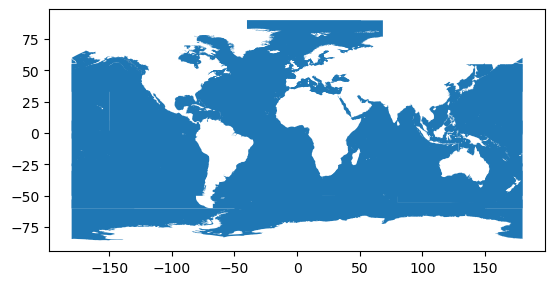

In [119]:
RFMOConvention.plot()

In [120]:
RFMOConvention.head(4)

,OBJECTID,AREATYPE,DEFRULE,DISPORDER,FILL,STROKE,RFB,SHAPE_LENG,SHAPE_AREA,ANCFEATURE,Perform,Collapse,Collapse2,FishingEff,area,geometry
0,12.0,1.0,1.0,1.0,1.0,1.0,CCAMLR,1662.664134,6665.400395,None,60.0,82.35,64.70,5.912111e+04,3.567803e+07,"POLYGON ((180.00000 -84.30220, 179.90840 -84.2..."
0,79.0,1.0,5.0,1.0,3.0,3.0,CCSBT,703.702240,5243.076304,None,46.5,90.06,67.20,1.681760e+06,5.006586e+07,"POLYGON ((120.09870 -10.38000, 120.12050 -10.3..."
1,80.0,1.0,5.0,1.0,3.0,3.0,CCSBT,253.419862,1752.423860,None,46.5,90.06,67.20,1.681760e+06,1.628845e+07,"POLYGON ((-174.60280 -31.04080, -169.75280 -31..."
0,15.0,1.0,5.0,1.0,1.0,3.0,GFCM,362.454860,308.539628,None,40.5,81.49,50.65,3.819809e+06,3.000341e+06,"POLYGON ((39.27760 47.23120, 39.30000 47.07690..."


In [121]:
len(RFMOConvention)

30

In [141]:
RFMOConSUM = RFMOConvention.dissolve(by="RFB",aggfunc={"FishingEff": "first",
         "area": "sum", "Perform":"first","Collapse2":"first"})

In [142]:
len(RFMOConSUM)

16

In [143]:
RFMOConSUM[:16]

,geometry,FishingEff,area,Perform,Collapse2
RFB,,,,,
CCAMLR,"POLYGON ((180.00000 -84.30220, 179.90840 -84.2...",5.912111e+04,3.567803e+07,60.0,64.70
CCSBT,"MULTIPOLYGON (((-169.75280 -31.97620, -150.000...",1.681760e+06,6.635430e+07,46.5,67.20
GFCM,"POLYGON ((39.27760 47.23120, 39.30000 47.07690...",3.819809e+06,3.000341e+06,40.5,50.65
IATTC,"MULTIPOLYGON (((-123.92000 49.79250, -123.9230...",2.432814e+06,6.635639e+07,52.0,57.76
ICCAT,"MULTIPOLYGON (((10.83190 54.33040, 10.79500 54...",1.801238e+07,8.895806e+07,52.0,49.05
IOTC,"POLYGON ((49.26350 30.42910, 49.22250 30.37330...",3.137981e+06,6.468506e+07,47.0,40.91
IPHC,"MULTIPOLYGON (((179.11520 55.34210, 179.16890 ...",6.451088e+05,3.942942e+06,38.5,65.19
NAFO,"MULTIPOLYGON (((-73.01330 78.15030, -72.94530 ...",1.032462e+06,6.295071e+06,44.5,67.03
NASCO,"MULTIPOLYGON (((-75.87000 36.49860, -75.86390 ...",1.027287e+07,2.032979e+07,30.0,55.88


In [130]:
#RFMOConSUM = RFMOConSUM.to_crs("ESRI:54012")
#RFMOConSUM.crs

In [147]:
RFMOConSUM['effort_density'] = RFMOConSUM['FishingEff']/RFMOConSUM['area']

In [144]:
RFMOConSUM = RFMOConSUM.reset_index()

In [148]:
RFMOConSUM.sort_values('FishingEff', ascending=False)

,RFB,geometry,FishingEff,area,Perform,Collapse2,effort_density
15,WCPFC,"MULTIPOLYGON (((-180.00000 -16.78730, -180.000...",2.641510e+07,1.059028e+08,61.5,44.80,0.249428
4,ICCAT,"MULTIPOLYGON (((10.83190 54.33040, 10.79500 54...",1.801238e+07,8.895806e+07,52.0,49.05,0.202482
8,NASCO,"MULTIPOLYGON (((-75.87000 36.49860, -75.86390 ...",1.027287e+07,2.032979e+07,30.0,55.88,0.505311
9,NEAFC,"MULTIPOLYGON (((-44.00000 60.31260, -43.99390 ...",8.856218e+06,1.349665e+07,42.5,55.84,0.656179
2,GFCM,"POLYGON ((39.27760 47.23120, 39.30000 47.07690...",3.819809e+06,3.000341e+06,40.5,50.65,1.273125
5,IOTC,"POLYGON ((49.26350 30.42910, 49.22250 30.37330...",3.137981e+06,6.468506e+07,47.0,40.91,0.048512
14,SPRFMO,"MULTIPOLYGON (((165.85700 -26.20290, 165.84250...",3.044041e+06,5.918658e+07,53.5,59.19,0.051431
3,IATTC,"MULTIPOLYGON (((-123.92000 49.79250, -123.9230...",2.432814e+06,6.635639e+07,52.0,57.76,0.036663
1,CCSBT,"MULTIPOLYGON (((-169.75280 -31.97620, -150.000...",1.681760e+06,6.635430e+07,46.5,67.20,0.025345
13,SIOFA,"POLYGON ((65.00000 10.00000, 65.00000 0.00000,...",1.313327e+06,2.693323e+07,45.0,57.14,0.048762


In [149]:
RFMOConSUM.sort_values('effort_density', ascending=False)

,RFB,geometry,FishingEff,area,Perform,Collapse2,effort_density
2,GFCM,"POLYGON ((39.27760 47.23120, 39.30000 47.07690...",3.819809e+06,3.000341e+06,40.5,50.65,1.273125
9,NEAFC,"MULTIPOLYGON (((-44.00000 60.31260, -43.99390 ...",8.856218e+06,1.349665e+07,42.5,55.84,0.656179
8,NASCO,"MULTIPOLYGON (((-75.87000 36.49860, -75.86390 ...",1.027287e+07,2.032979e+07,30.0,55.88,0.505311
15,WCPFC,"MULTIPOLYGON (((-180.00000 -16.78730, -180.000...",2.641510e+07,1.059028e+08,61.5,44.80,0.249428
4,ICCAT,"MULTIPOLYGON (((10.83190 54.33040, 10.79500 54...",1.801238e+07,8.895806e+07,52.0,49.05,0.202482
7,NAFO,"MULTIPOLYGON (((-73.01330 78.15030, -72.94530 ...",1.032462e+06,6.295071e+06,44.5,67.03,0.164011
6,IPHC,"MULTIPOLYGON (((179.11520 55.34210, 179.16890 ...",6.451088e+05,3.942942e+06,38.5,65.19,0.163611
11,PSC,"MULTIPOLYGON (((-136.40170 57.82870, -136.4013...",2.470104e+05,1.562286e+06,31.5,55.88,0.158108
14,SPRFMO,"MULTIPOLYGON (((165.85700 -26.20290, 165.84250...",3.044041e+06,5.918658e+07,53.5,59.19,0.051431
13,SIOFA,"POLYGON ((65.00000 10.00000, 65.00000 0.00000,...",1.313327e+06,2.693323e+07,45.0,57.14,0.048762


<AxesSubplot: >

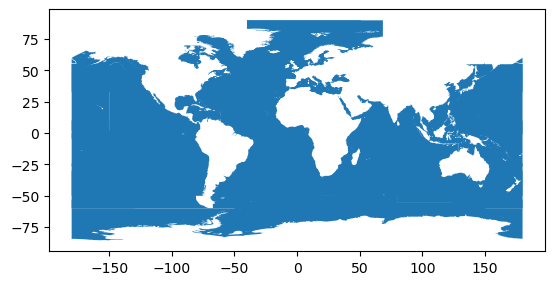

In [112]:
RFMOConSUM.plot()

In [113]:
len(RFMOConSUM)

16

In [150]:
RFMOConSUM[['RFB','geometry','FishingEff','area','Perform','Collapse2','effort_density']].to_file('RFMOConvention.shp')

/tmp/ipykernel_671/3449534256.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  RFMOConSUM[['RFB','geometry','FishingEff','area','Perform','Collapse2','effort_density']].to_file('RFMOConvention.shp')


In [20]:
RFMOFishingTable = RFMOConSUM.drop('geometry', axis=1)

In [21]:
RFMOFishingTable.to_csv('RFMOFishingTable.csv')